# ECCO HEAT BUDGET

### 13-tile native lat-lon-cap 90 grid
The lat-lon-cap (llc) is the decomposition of the spherical Earth into a Cartesian curvilinear coordinate system . It is a topologically non-trivial cubed-sphere rendering in the northern hemisphere and a dipolar grid in the southern hemisphere. Between 70°S and ~57°N, model grid cells are approximately oriented to lines of latitude and longitude. A special Arctic “cap” is situated north of ~57°N.

The Cartesian curvilinear coordinate system is divided into 13 tiles, each consisting of 90x90 grid cells in the horizontal and 50 vertical levels. Horizontal model grid resolution varies spatially from 22km to 110km, with the highest resolutions at high latitudes and lowest resolution in mid latitudes. Vertical grid spacing increases with depth from 10m to 456.5m. The bottom of the deepest model grid cell is 6145m below the surface.

In [ ]:
from dask.distributed import Client

client = Client("tcp://10.32.60.114:36039")
client

In [21]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
%matplotlib inline

In [22]:
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon

In [23]:
ecco_url = 'https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml'
ecco_cat = intake.Catalog(ecco_url)
ds = ecco_cat["ECCOv4r3"].to_dask()
ds

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
    Depth      (face, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(13, 90, 90)>
    PHrefC     (k) float32 dask.array<shape=(50,), chunksize=(50,)>
    PHrefF     (k_p1) float32 dask.array<shape=(51,), chunksize=(51,)>
    XC         (face, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(13, 90, 90)>
    XG         (face, j_g, i_g) float32 dask.array<shape=(13, 90, 90), chunksize=(13, 90, 90)>
    YC         (face, j, i) float32 dask.array<shape=(13, 90, 90), chunksize=(13, 90, 90)>
    YG         (face, j_g, i_g) float32 dask.array<shape=(13, 90, 90), chunksize=(13, 90, 90)>
    Z          (k) float32 dask.array<shape=(50,), chunksize=(50,)>
    Zl         (k_l) float32 dask.array<shape=(50,), chunksize=(50,)>
    Zp1        (k_p1) float32 dask.array<shape=(51,), chunksize=(51,)>
    Zu         (k_u) float32 dask.array<

In [24]:
ds_ll = faces_dataset_to_latlon(ds)
ds_ll

<xarray.Dataset>
Dimensions:    (face: 13, i: 360, i_g: 360, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-0

In [25]:
# a trick to make things work a bit faster
coords = ds_ll.coords.to_dataset().reset_coords()
ds = ds_ll.reset_coords(drop=True)
ds

<xarray.Dataset>
Dimensions:    (face: 13, i: 360, i_g: 360, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-0

In [26]:
coords

<xarray.Dataset>
Dimensions:   (face: 13, i: 360, i_g: 360, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * time_snp  (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
Data

In [29]:
coords.Depth.j

<xarray.DataArray 'j' (j: 270)>
array([  0,   1,   2, ..., 267, 268, 269])
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
Attributes:
    axis:           Y
    long_name:      y-dimension of the t grid
    standard_name:  y_grid_index
    swap_dim:       YC

In [ ]:
coords.Depth.i

In [ ]:
ds.THETA_snp

In [ ]:
ds.THETA

In [97]:
sst_mean_crude = ds.THETA.isel(k=0).mean(dim='time').load()
sst_mean_crude

<xarray.DataArray 'THETA' (j: 270, i: 360)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    k        int64 0
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... -10 -9 -8 -7 -6 -5 -4 -3 -2 -1
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269

In [98]:
sst_mean_crude.i

<xarray.DataArray 'i' (i: 360)>
array([ 0,  1,  2, ..., -3, -2, -1])
Coordinates:
    k        int64 0
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... -10 -9 -8 -7 -6 -5 -4 -3 -2 -1
Attributes:
    axis:           X
    long_name:      x-dimension of the t grid
    standard_name:  x_grid_index
    swap_dim:       XC

In [132]:
surface_mask_crude = (coords.hFacC[0]>0)
surface_mask = surface_mask.roll(i=179).load()

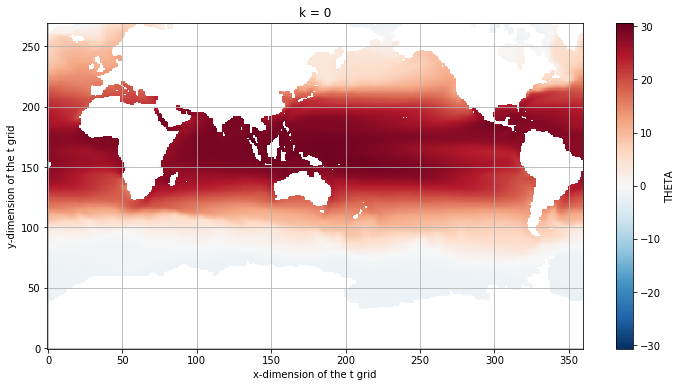

In [36]:
sst_mean_crude.where(surface_mask).plot(figsize=(12,6))
plt.grid();

In [99]:
sst_mean_crude.j.data

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [100]:
sst_mean_crude.i.data

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

In [139]:
#rolling lon to start from negative to positive
sst_mean = sst_mean_crude.roll(i=179)
sst_mean

<xarray.DataArray 'THETA' (j: 270, i: 360)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    k        int64 0
  * i        (i) int64 -179 -178 -177 -176 -175 -174 ... 175 176 177 178 179 180
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269

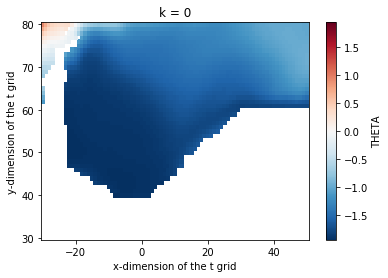

In [140]:
sst_mean_wg = sst_mean.sel(i=slice(-30, 50), j=slice(30, 80))
sst_mean_wg.where(surface_mask).plot()

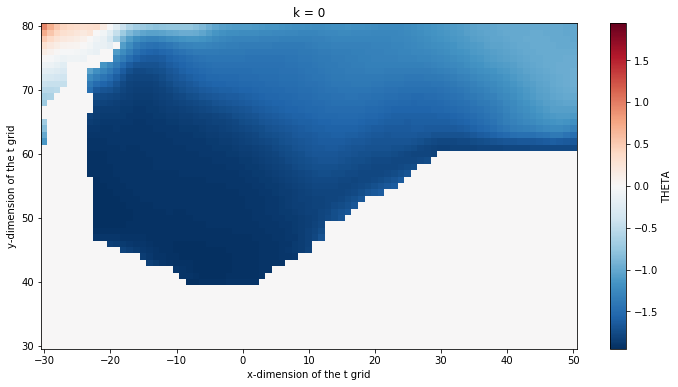

In [141]:
sst_mean.sel(i=slice(-30, 50), j=slice(30, 80)).plot(figsize=(12,6))

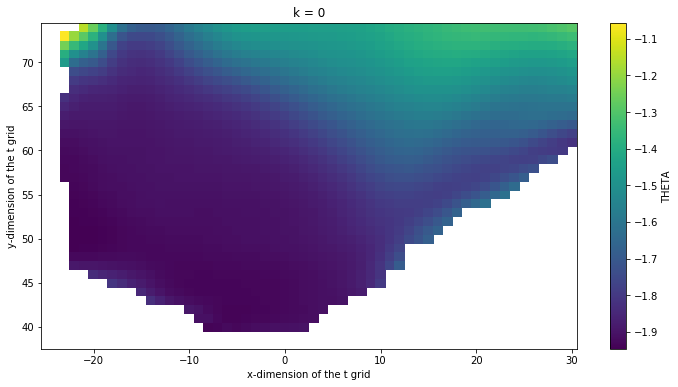

In [166]:
sst_mean.where(surface_mask).sel(i=slice(-25, 30), j=slice(38, 74)).plot(figsize=(12,6))

In [170]:
sst_mean.j.data

<xarray.DataArray 'j' (j: 270)>
array([  0,   1,   2, ..., 267, 268, 269])
Coordinates:
    k        int64 0
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
Attributes:
    axis:           Y
    long_name:      y-dimension of the t grid
    standard_name:  y_grid_index
    swap_dim:       YC

In [184]:
left_i = -24
right_i = 30
upper_j = 74
lower_j = 38

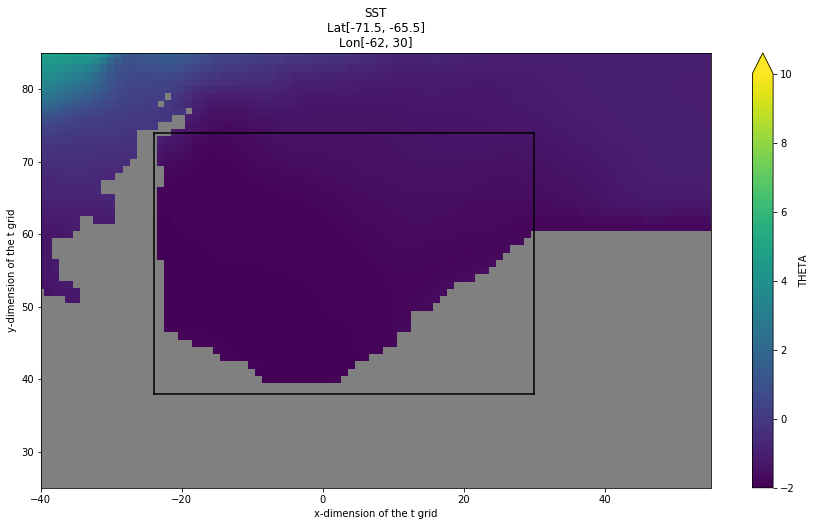

In [196]:
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={'facecolor': '0.5'})
sst_mean.where(surface_mask).plot(ax=ax,  vmin=-2, vmax=10)
ax.plot([left_i, right_i], [upper_j, upper_j], color='k')
ax.plot([right_i, right_i], [lower_j, upper_j], color='k')
ax.plot([left_i, left_i], [lower_j, upper_j], color='k')
ax.plot([left_i, right_i], [lower_j, lower_j], color='k')

ax.set_xlim([-40, 55])
ax.set_ylim([25, 85])
plt.title('SST\nLat[-71.5, -65.5]\nLon[-62, 30]');

In [207]:
#set the boundaries
lat_range = dict(j=slice(lower_j, upper_j))
lon_range = dict(i=slice(left_i, right_i))

In [199]:
ds.ADVr_TH.sel(j=upper_j, method='nearest')

<xarray.DataArray 'ADVr_TH' (time: 288, k_l: 50, i: 360)>
dask.array<shape=(288, 50, 360), dtype=float32, chunksize=(1, 50, 90)>
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... -10 -9 -8 -7 -6 -5 -4 -3 -2 -1
    j        int64 74
Attributes:
    long_name:      Vertical   Advective Flux of Pot.Temperature
    standard_name:  ADVr_TH
    units:          degC.m^3/s

In [204]:
ds.ADVy_TH

<xarray.DataArray 'ADVy_TH' (time: 288, k: 50, j_g: 270, i: 360)>
dask.array<shape=(288, 50, 270, 360), dtype=float32, chunksize=(1, 50, 1, 90)>
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... -10 -9 -8 -7 -6 -5 -4 -3 -2 -1
Attributes:
    long_name:      Meridional Advective Flux of Pot.Temperature
    mate:           ADVx_TH
    standard_name:  ADVy_TH
    units:          degC.m^3/s

In [205]:
ds.ADVx_TH

<xarray.DataArray 'ADVx_TH' (time: 288, k: 50, j: 270, i_g: 360)>
dask.array<shape=(288, 50, 270, 360), dtype=float32, chunksize=(1, 50, 90, 90)>
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
Attributes:
    long_name:      Zonal      Advective Flux of Pot.Temperature
    mate:           ADVy_TH
    standard_name:  ADVx_TH
    units:          degC.m^3/s

In [208]:
#advective flux
adv_flux_y = ds.ADVy_TH.sel(**lon_range).sel(j_g=upper_j, method='nearest').sum(dim=['i', 'k']).load()
adv_flux_x = ds.ADVx_TH.sel(**lat_range).sel(i_g=right_i, method='nearest').sum(dim=['j', 'k']).load()
adv_flux = adv_flux_x + adv_flux_y
adv_flux.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 288)>
array([ 4157085.5,  3734443.5,  3715589.2, ..., -1848531.2, -1857463.8,
       -2469476.2], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
    i_g      int64 30
    j_g      int64 74

In [212]:
#diffusive flux
diff_flux_y = ds.DFyE_TH.sel(**lon_range).sel(j_g=upper_lat, method='nearest').sum(dim=['i', 'k']).load()
diff_flux_x = ds.DFxE_TH.sel(**lat_range).sel(i_g=right_i, method='nearest').sum(dim=['j', 'k']).load()
diff_flux = diff_flux_x + diff_flux_y
diff_flux.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 288)>
array([-117970.16 , -122181.945, -132222.03 , ...,  -84748.29 ,  -83771.56 ,
        -49667.133], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
    i_g      int64 30
    j_g      int64 0

In [214]:
#vertical flux
t_flux_z = (ds.TFLUX.sel(**lat_range, **lon_range) * coords.rA).sum(dim=['i','j'])
t_flux_z.load()
#units: W = (kg*m^2)/s^3

<xarray.DataArray (time: 288)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14